**4.1** ФОРМУЛИРОВКА <br/>
Задана конфигурация нейронной сети для решения задачи регрессии y ~= g(x1, x2).
![image.png](nn.png)

<br/>
Требуется обучить персептрон так, чтобы значение весов, при которых ошибка, вычисленная по формуле ![image.png](error_formula.png), не превышает 0,01.

y = g(x1, x2) = f(h21 * w1 + h22 * w2 + h23 * w3) 
= f( f(h11 * v11 + h12 * v21) * w1 + f(h11 * v12 + h12 * v22) * w2 + f(h11 * v13 + h12 * v23) * w3)

h11 = f(x1 * w11 + x2 * w21); 
h12 = f(x1 * w12 + x2 * w22);

f - сигмоидная функция активации.

Нейронная сеть на входе имеет параметры x1 и x2.
Будет три слоя, на выходе мы получаем y

Первый слой: вычисление h11 и h12
h11 = f(x1 * w11 + x2 * w21) где w11 это вес между x1 и h11, а w21 это вес между x12и h11
h12 = f(x1 * w12 + x2 * w22) гду w12 вес мужду x1 и h12, а w22 это вес между x2 и h12

Второй слой уже имеет h21, h22, h23
h21 = f(h11 * v11 + h12 * v21) где v11 вес между h11 и h21, а v21 вес между h12 и h21
h22 = f(h11 * v12 + h12 * v22) где v12 вес между h11 и h22, а v22 вес между h12 и h22
h23 = f(h11 * v13 + h12 * v23) где v13 вес между h11 и h23, а v23 вес между h12 и h23

На третьем слое получаем y
y = f(h21 * w1 + h22 * w2 + h23 * w3)

In [57]:
# Определение модели персептрона согласно заданным формулам

import torch
import torch.nn as nn
import torch.optim as optim

class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        # Первый слой
        self.h11 = nn.Linear(2, 1) # Один нейрон с двумя входами
        self.h12 = nn.Linear(2, 1)
        # Второй слой
        self.h21 = nn.Linear(2, 1)
        self.h22 = nn.Linear(2, 1)
        self.h23 = nn.Linear(2, 1)
        # Третий слой
        self.w1 = nn.Parameter(torch.randn(1))
        self.w2 = nn.Parameter(torch.randn(1))
        self.w3 = nn.Parameter(torch.randn(1))

    def forward(self, x):
        # Первый слой
        h11 = torch.sigmoid(self.h11(x))
        h12 = torch.sigmoid(self.h12(x))
        # Второй слой
        h21_input = torch.cat([h11, h12], dim=1)
        h21 = torch.sigmoid(self.h21(h21_input))
        h22 = torch.sigmoid(self.h22(h21_input))
        h23 = torch.sigmoid(self.h23(h21_input))
        # Третий слой
        y = torch.sigmoid(h21 * self.w1 + h22 * self.w2 + h23 * self.w3)
        return y


In [58]:
# Создание модели, функции потерь и оптимизатора
model = Perceptron()
# среднеквадратичная ошибка (MSE) нейронной сети - то, что мы будем пытаться минимизировать
criterion = nn.MSELoss()
# стохастический градиентный спуск - функция для обновления весов
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [59]:
# Подготовка данных - создаем для PyTorch тензоры из данных чтобы использовать их в качестве входов для обучения.
# Перед началом обучения данные стандартизируются или нормализуются.

import pandas as pd

x_file = pd.read_csv('xdata.csv', delimiter=';')
y_file = pd.read_csv('ydata03.csv')
x = x_file.values
y = y_file.values

In [60]:
print(x)

[[-0.2996     -0.15857864]
 [-0.2991     -0.12679492]
 [-0.2984     -0.1       ]
 [-0.2975     -0.0763932 ]
 [-0.2964     -0.05505103]
 [-0.2951     -0.03542487]
 [-0.2936     -0.01715729]
 [-0.2919      0.        ]
 [-0.29        0.01622777]
 [-0.2879      0.03166248]
 [-0.2856      0.04641016]
 [-0.2831      0.06055513]
 [-0.2804      0.07416574]
 [-0.2775      0.08729833]
 [-0.2744      0.1       ]
 [-0.2711      0.11231056]
 [-0.2676      0.12426407]
 [-0.2639      0.13588989]
 [-0.26        0.1472136 ]
 [-0.2559      0.15825757]
 [-0.2516      0.16904158]
 [-0.2471      0.17958315]
 [-0.2424      0.18989795]
 [-0.2375      0.2       ]
 [-0.2324      0.20990195]
 [-0.2271      0.21961524]
 [-0.2216      0.22915026]
 [-0.2159      0.23851648]
 [-0.21        0.24772256]
 [-0.2039      0.25677644]
 [-0.1976      0.26568542]
 [-0.1911      0.27445626]
 [-0.1844      0.28309519]
 [-0.1775      0.29160798]
 [-0.1704      0.3       ]
 [-0.1631      0.30827625]
 [-0.1556      0.3164414 ]
 

In [61]:
print(y)

[[0.58966817]
 [0.59040073]
 [0.59102386]
 [0.59157832]
 [0.59208501]
 [0.59255636]
 [0.59300046]
 [0.59342294]
 [0.59382788]
 [0.59421838]
 [0.59459685]
 [0.59496518]
 [0.59532493]
 [0.59567737]
 [0.59602357]
 [0.59636442]
 [0.5967007 ]
 [0.59703307]
 [0.5973621 ]
 [0.5976883 ]
 [0.59801211]
 [0.59833393]
 [0.5986541 ]
 [0.59897293]
 [0.59929072]
 [0.59960771]
 [0.59992413]
 [0.60024019]
 [0.60055608]
 [0.60087197]
 [0.60118802]
 [0.60150437]
 [0.60182117]
 [0.60213852]
 [0.60245654]
 [0.60277534]
 [0.60309502]
 [0.60341565]
 [0.60373732]
 [0.60406012]
 [0.6043841 ]
 [0.60470933]
 [0.60503587]
 [0.60536378]
 [0.60569311]
 [0.6060239 ]
 [0.6063562 ]
 [0.60669005]
 [0.60702548]
 [0.60736253]
 [0.60770122]
 [0.6080416 ]
 [0.60838367]
 [0.60872747]
 [0.609073  ]
 [0.60942031]
 [0.60976938]
 [0.61012025]
 [0.61047293]
 [0.61082741]
 [0.61118372]
 [0.61154185]
 [0.61190181]
 [0.61226361]
 [0.61262725]
 [0.61299271]
 [0.61336002]
 [0.61372915]
 [0.6141001 ]
 [0.61447288]
 [0.61484746]
 [0.61

In [62]:
from sklearn.model_selection import train_test_split

# Разбиваем на тестовую и тренировочную выборки 85/15
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [63]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [64]:
# ... (ваш код стандартизации/нормализации данных, если требуется)

In [65]:
from torch.utils.data import DataLoader, TensorDataset

# Создание DataLoader для обучения
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [66]:
# Обучение с условием выхода
desired_error = 0.01
current_error = float('inf')
num_epochs = 0

while current_error > desired_error:
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Смотрим ошибку на тестовой выборке данных
    with torch.no_grad():
        all_outputs = model(x_test_tensor)
        total_loss = criterion(all_outputs, y_test_tensor)

    current_error = total_loss.item()
    num_epochs += 1
    print(f'Epoch {num_epochs}, Loss: {current_error}')

print(f'Training finished. Final error: {current_error}')

Epoch 1, Loss: 0.12097789347171783
Epoch 2, Loss: 0.12062125653028488
Epoch 3, Loss: 0.12026519328355789
Epoch 4, Loss: 0.11990942060947418
Epoch 5, Loss: 0.1195545569062233
Epoch 6, Loss: 0.11919926851987839
Epoch 7, Loss: 0.11884479969739914
Epoch 8, Loss: 0.11849106103181839
Epoch 9, Loss: 0.11813797056674957
Epoch 10, Loss: 0.11778541654348373
Epoch 11, Loss: 0.11743387579917908
Epoch 12, Loss: 0.11708211898803711
Epoch 13, Loss: 0.11673126369714737
Epoch 14, Loss: 0.11638106405735016
Epoch 15, Loss: 0.11603205651044846
Epoch 16, Loss: 0.11568371951580048
Epoch 17, Loss: 0.11533588916063309
Epoch 18, Loss: 0.11498809605836868
Epoch 19, Loss: 0.11464045196771622
Epoch 20, Loss: 0.114293672144413
Epoch 21, Loss: 0.1139475554227829
Epoch 22, Loss: 0.11360166221857071
Epoch 23, Loss: 0.11325657367706299
Epoch 24, Loss: 0.11291210353374481
Epoch 25, Loss: 0.11256781220436096
Epoch 26, Loss: 0.11222425848245621
Epoch 27, Loss: 0.11188183724880219
Epoch 28, Loss: 0.11153949797153473
Epoch

In [67]:
from sklearn.metrics import accuracy_score

# Предсказания для тестового набора данных
with torch.no_grad():
    predictions = model(x_test_tensor)

# Преобразование предсказаний в бинарные метки (0 или 1)
binary_predictions = (predictions >= 0.5).float()
# Преобразование меток тестового набора в бинарные метки (если необходимо)
binary_labels = (y_test_tensor >= 0.5).float()

accuracy = accuracy_score(binary_labels.numpy(), binary_predictions.numpy())
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [68]:
# значения смещения (bias) для слоя
print("\nВеса первого слоя:")
print("h11:", model.h11.weight.data.numpy(), model.h11.bias.data.numpy())
print("h12:", model.h12.weight.data.numpy(), model.h12.bias.data.numpy())

print("\nВеса второго слоя:")
print("h21:", model.h21.weight.data.numpy(), model.h21.bias.data.numpy())
print("h22:", model.h22.weight.data.numpy(), model.h22.bias.data.numpy())
print("h23:", model.h23.weight.data.numpy(), model.h23.bias.data.numpy())

print("\nВеса третьего слоя:")
print("w1:", model.w1.data.numpy())
print("w2:", model.w2.data.numpy())
print("w3:", model.w3.data.numpy())


Веса первого слоя:
h11: [[-0.6401693  -0.00475632]] [-0.20022073]
h12: [[0.46414253 0.5485788 ]] [-0.11378223]

Веса второго слоя:
h21: [[ 0.3987472  -0.51611125]] [0.37415844]
h22: [[-0.26039526 -0.47334513]] [0.32202435]
h23: [[ 0.3911116  -0.40017655]] [-0.47521725]

Веса третьего слоя:
w1: [-0.05555632]
w2: [0.60394126]
w3: [-0.6154566]


/var/folders/xj/zsznjkrj1xj89f8v149z8v7h0000gp/T/ipykernel_52419/3229853656.py:9: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[:, 0], x_test[:, 1], c=predictions.flatten(), cmap=plt.cm.Paired, marker='x', edgecolor='r', label='Предсказанные значения')


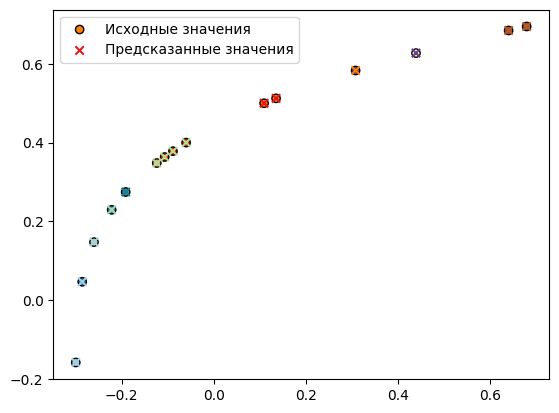

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Предсказания для тестового набора данных
with torch.no_grad():
    predictions = model(x_test_tensor).numpy()

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test.flatten(), cmap=plt.cm.Paired, edgecolor='k', label='Исходные значения')
plt.scatter(x_test[:, 0], x_test[:, 1], c=predictions.flatten(), cmap=plt.cm.Paired, marker='x', edgecolor='r', label='Предсказанные значения')

plt.legend()
plt.show()